In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("cities_r2.csv")
df.head(2)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594


Let us first try to see how the sates rank based on population and then delve deeper in the question mentioned

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19536\607691538.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = x.sum().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19536\607691538.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  genre_count = sns.barplot(y='state_name', x='population_total', data=temp, palette="Blues", ci=None)


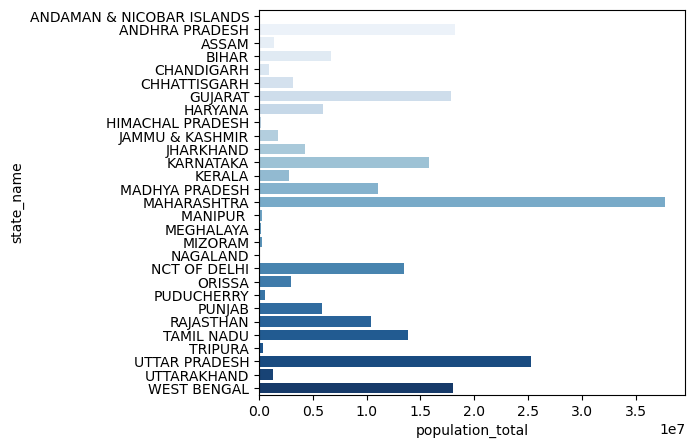

In [3]:
x = df.groupby('state_name')
temp = x.sum().reset_index()
plt.rcParams['figure.figsize'] = (5.5, 5.0)
genre_count = sns.barplot(y='state_name', x='population_total', data=temp, palette="Blues", ci=None)

From all the other notebooks, it was evident that Maharashtra is the most populated state. Since this plot is self explanatory, I want to move to the next part of analysis.

Let us now see how the states fare on the basis of the effective literacy rate. Now for my point statistic I have chosen the median because the scale of literacy rate in each state is quite large and choosing median would be the right statistic.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19536\2987618314.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = x.median().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19536\2987618314.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  genre_count = sns.barplot(y='state_name', x='effective_literacy_rate_total', data=temp, palette="Blues", ci=None)


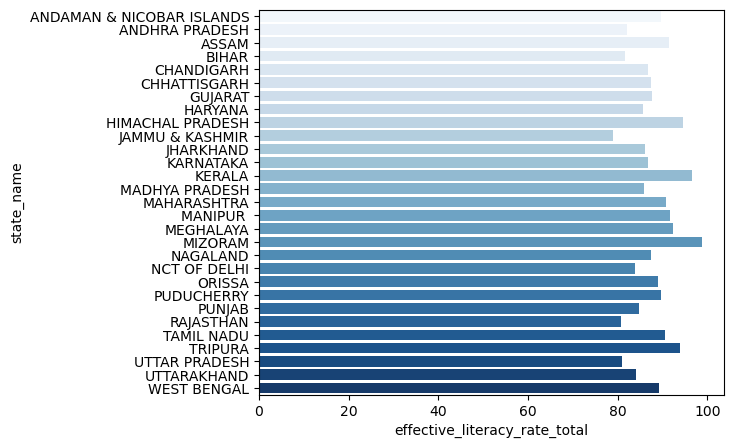

In [4]:
x = df.groupby('state_name')
temp = x.median().reset_index()
plt.rcParams['figure.figsize'] = (6.0, 5.0)
genre_count = sns.barplot(y='state_name', x='effective_literacy_rate_total', data=temp, palette="Blues", ci=None)

Well it was not very evident as to which states performed the best, so I went and sorted them to see the top and the worst performing states in the country based on the literacy rate.

In [5]:
temp = temp.sort_values(by='effective_literacy_rate_total', ascending=False)
print (temp[['state_name','effective_literacy_rate_total']].reset_index())

    index                 state_name  effective_literacy_rate_total
0      17                    MIZORAM                         98.800
1      12                     KERALA                         96.560
2       8           HIMACHAL PRADESH                         94.670
3      25                    TRIPURA                         93.880
4      16                  MEGHALAYA                         92.340
5      15                   MANIPUR                          91.700
6       2                      ASSAM                         91.425
7      14                MAHARASHTRA                         90.720
8      24                 TAMIL NADU                         90.485
9       0  ANDAMAN & NICOBAR ISLANDS                         89.760
10     21                 PUDUCHERRY                         89.745
11     28                WEST BENGAL                         89.250
12     20                     ORISSA                         89.050
13      6                    GUJARAT            

Great result! More than 70% of the sates had a median literacy rate of more than 85%! The next step I wanted to take was to see how does the distribution of sex ratio behave in the lower and higher literacy ranked states.

'
Since the states like Mizoram, Himachal Pradesh, Tripura, Meghalaya and Manipur had only one observation each, I wasn't able to plot their distributions. The top two states with more than 1 observation were Kerala and Assam while the poorly performing Jammu & Kashmir and Rajasthan have their distributions below:

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19536\2266759113.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x['sex_ratio'], color='blue', hist=False, label='ASSAM')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19536\2266759113.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax 

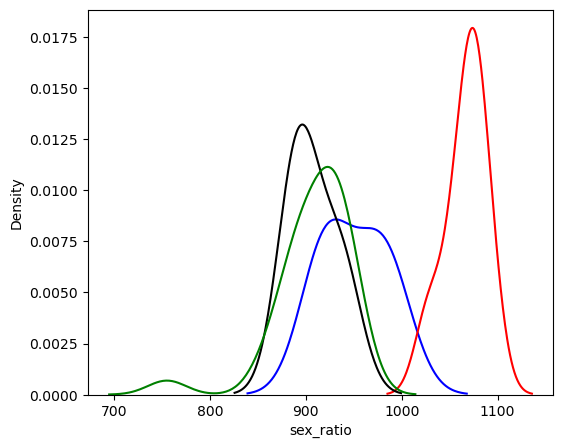

In [6]:
x = df[(df['state_name']=='ASSAM')]
ax = sns.distplot(x['sex_ratio'], color='blue', hist=False, label='ASSAM')
x = df[(df['state_name']=='KERALA')]
ax = sns.distplot(x['sex_ratio'], color='red', hist=False, label='KERALA')
x = df[(df['state_name']=='JAMMU & KASHMIR')]
ax = sns.distplot(x['sex_ratio'], color='black', hist=False, label='JAMMU & KASHMIR')
x = df[(df['state_name']=='RAJASTHAN')]
ax = sns.distplot(x['sex_ratio'], color='green', hist=False, label='RAJASTHAN')

Another interesting plot! Better literacy performing states have better sex ratio! But we haven't done any statistics yet so that wouldn't be a valid statement. Let us try some though by first seeing if there is a linear fit between sex_ratio and effective_literacy_rate_total:

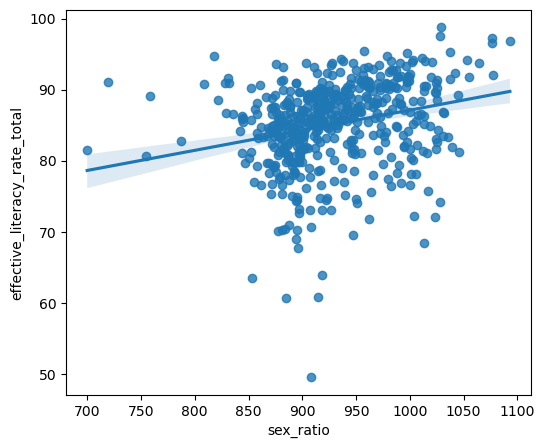

In [7]:
 ax = sns.regplot(x="sex_ratio", y="effective_literacy_rate_total", data=df)

Well it doesn't look like there is a very good evidence of a linear fit between sex ratio and literacy rate. Let us see if there is a correlation between the two and how strong the correlation is:

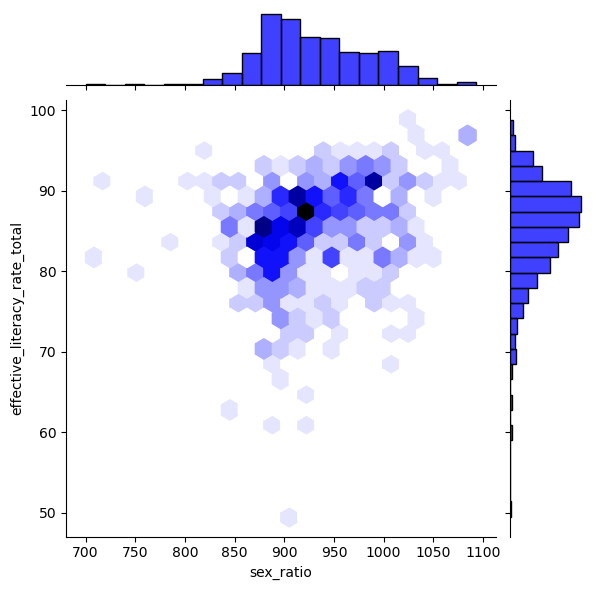

In [8]:
sns.jointplot(x=df['sex_ratio'], y=df['effective_literacy_rate_total'], kind="hex", color="b");

A good news is that there is a positive correlation between the two. Though not very strong, there is still an effective correlation and also the p-value is pretty small which again gives us a good statistic to decide that the correlation is not 0 amongst the two variables.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19536\67922489.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = x.sum().reset_index()


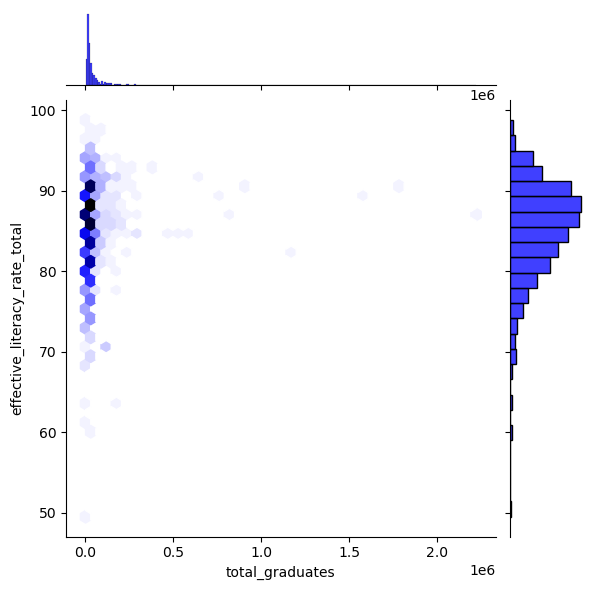

In [10]:
x = df.groupby('state_name')
temp = x.sum().reset_index()
sns.jointplot(x=df['total_graduates'], y=df['effective_literacy_rate_total'], kind="hex", color="b");

The above plot seems a bit strange where we see that there is hardly any linear correlation between the total number of graduates and the effective literacy rate.

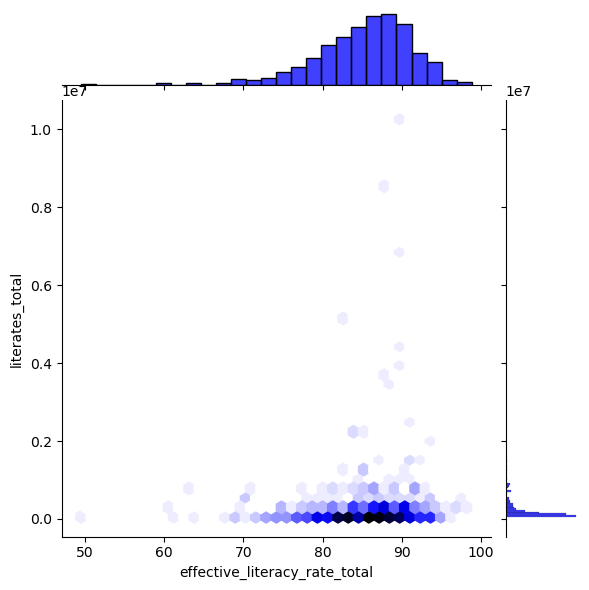

In [11]:
sns.jointplot(x=df['effective_literacy_rate_total'], y=df['literates_total'], kind="hex", color="b");

Again, there is very poor linear correlation between the total number of literates and the effective literacy rate!


In the next part of the EDA, I wanted to see the extent of literacy gap amongst both the genders and wanted to point out places, where the gap is the worst. First interesting observation I came across was that NO city in the country had literacy rate of females higher than the men. This could boil down to the fact that the sex ratio is pretty poor in the country and when there are more men, they will have an added advantage on the literacy rate.
Next, I did a little bit of data wrangling and plotted the 10 worst places in the terms literacy gaps amongst both the gender.

In [12]:
df.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19536\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
state_code,1.000000,-0.088946,0.054953,0.048442,0.062276,0.030726,0.025069,0.037050,0.068414,0.060318,0.078278,0.647582,0.530039,0.387393,0.386657,0.386275,0.036701,0.038541,0.034332
dist_code,-0.088946,1.000000,0.318398,0.319937,0.316385,0.318881,0.318189,0.319461,0.315055,0.316732,0.312612,-0.071230,-0.006449,0.005983,-0.003357,0.011688,0.322658,0.323013,0.321438
population_total,0.054953,0.318398,1.000000,0.999647,0.999547,0.991590,0.989977,0.992786,0.998777,0.998561,0.997831,-0.127811,-0.027147,0.079707,0.039787,0.100713,0.977282,0.976239,0.976206
population_male,0.048442,0.319937,0.999647,1.000000,0.998395,0.991738,0.990528,0.992482,0.998473,0.999003,0.996611,-0.139004,-0.034290,0.077046,0.037451,0.097581,0.974116,0.972722,0.973484
population_female,0.062276,0.316385,0.999547,0.998395,1.000000,0.990577,0.988509,0.992283,0.998270,0.997210,0.998361,-0.115034,-0.019040,0.082651,0.042396,0.104171,0.980032,0.979389,0.978455
0-6_population_total,0.030726,0.318881,0.991590,0.991738,0.990577,1.000000,0.999740,0.999673,0.986423,0.987572,0.983815,-0.158482,-0.054903,0.050218,0.016279,0.067407,0.968286,0.968568,0.965591
0-6_population_male,0.025069,0.318189,0.989977,0.990528,0.988509,0.999740,1.000000,0.998830,0.984544,0.986181,0.981337,-0.165095,-0.064842,0.048611,0.015208,0.065270,0.965461,0.965528,0.963040
0-6_population_female,0.037050,0.319461,0.992786,0.992482,0.992283,0.999673,0.998830,1.000000,0.987920,0.988521,0.985984,-0.150968,-0.043724,0.051988,0.017471,0.069762,0.970855,0.971378,0.967855
literates_total,0.068414,0.315055,0.998777,0.998473,0.998270,0.986423,0.984544,0.987920,1.000000,0.999557,0.999331,-0.117465,-0.019177,0.105607,0.065902,0.125006,0.976203,0.974338,0.976149
literates_male,0.060318,0.316732,0.998561,0.999003,0.997210,0.987572,0.986181,0.988521,0.999557,1.000000,0.997800,-0.130386,-0.028000,0.099151,0.061108,0.117270,0.972744,0.970644,0.972988


In [13]:
#pop of male and female is showing high corr to +ve corr to total population
#total graduates male and female graduates is also showing +ve corr to total population
#female male total graduates and literares male and female and total is also showing high +ve cor to male population


In [14]:
df['education_gap'] = df['effective_literacy_rate_male'] - df['effective_literacy_rate_female']
temp = df.sort_values(by='education_gap', ascending=False)[:10]
x = temp[['name_of_city','state_name']]
x = pd.concat([x]*2, ignore_index=True)
x['sex'] = 'male'
x['sex'][10:] = 'female'
x['literacy'] = 0.0
x['literacy'][:10] = temp['effective_literacy_rate_male']
x['literacy'][10:] = temp['effective_literacy_rate_female']
x['place'] = x['name_of_city']+x['state_name']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19536\2986900772.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['literacy'][:10] = temp['effective_literacy_rate_male']
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19536\2986900772.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['literacy'][10:] = temp['effective_literacy_rate_female']


C:\hello world\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


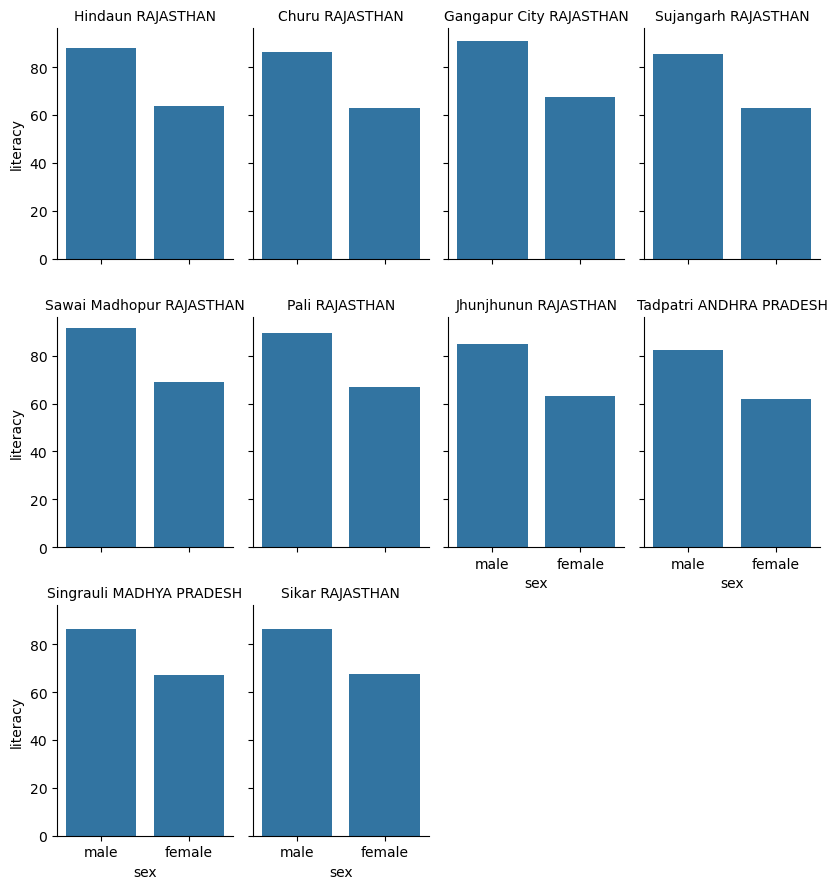

In [15]:
g = sns.FacetGrid(x, col="place", col_wrap=4, aspect=0.7)
g = g.map(sns.barplot, "sex", "literacy").set_titles("{col_name}")

Out of the 10 worst performing places, 8 were from Rajasthan! Doesn't speak volumes!

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19536\1838447323.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = x.mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19536\1838447323.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  genre_count = sns.barplot(y='state_name', x='total_graduates', data=temp, palette="Blues", ci=None)


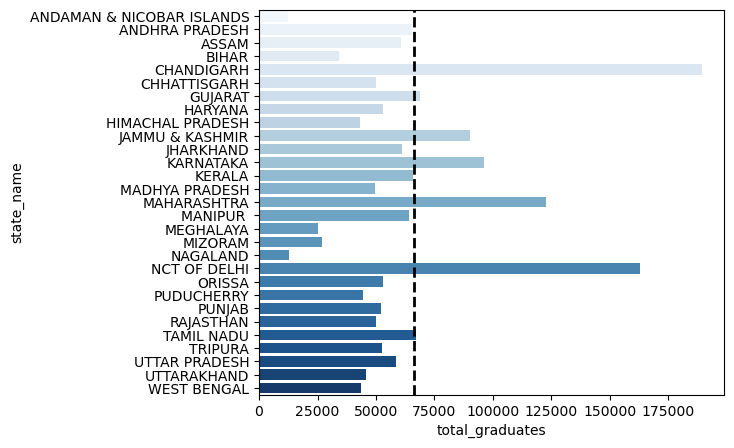

In [16]:
plt.rcParams['figure.figsize'] = (6.0, 5.0)
x = df.groupby('state_name')
temp = x.mean().reset_index()
genre_count = sns.barplot(y='state_name', x='total_graduates', data=temp, palette="Blues", ci=None)
ax = plt.axvline(x = df['total_graduates'].mean(), color='black', linestyle='dashed', linewidth=2)

The black dashed line represents the median number of graduates for the 500 cities in the dataset and the bar plots show the total number of graduates for each state.

Now, for the final EDA I wanted to check which states have districts where although the female population is low, the number of female graduates are more than their men counterparts:

In [17]:
df[((df['female_graduates']>df['male_graduates']) & (df['population_male']>df['population_female']))]['state_name']

26      PUNJAB
61      PUNJAB
66      PUNJAB
168     PUNJAB
214     PUNJAB
226     PUNJAB
262     PUNJAB
289     PUNJAB
314     PUNJAB
369     PUNJAB
491    HARYANA
Name: state_name, dtype: object